<a href="https://colab.research.google.com/github/zzhining/wallmart_dataset_analysis/blob/main/notebook/wallmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- [Kaggle - Colab 연동 방법](https://coachspace.oopy.io/note/data_analysis/kaggle)

## kaggle.json 업로드

In [1]:
# from google.colab import files
# files.upload()

## kaggle 폴더 생성 및 파일 이동

In [2]:
# ctrl + v
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 66 Oct  1 09:44 kaggle.json
/content


## 권한 설정

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

## 데이터 셋 다운로드

In [4]:
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
walmart-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## 데이터셋 압축 해제

In [5]:
import zipfile

with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## 데이터 불러오기

In [6]:
import pandas as pd

df = pd.read_csv('data/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# EDA
- [쇼핑몰 데이터 분석](https://coachspace.oopy.io/note/data_analysis/shopping)

In [7]:
# 전체 데이터가 몇 개 있는것인가? 550068개
df.shape

(550068, 10)

전체 550,068개의 인스턴스가 있는 것으로 확인되었습니다.

In [8]:
# 몇 명의 User에 대한 정보가 있는 것인가? (`User_ID`의 개수)
df['User_ID'].nunique()
# len(df['User_ID'].value_counts())

5891

총 5,891명의 사용자에 대한 거래 내역이 담겨있는 데이터 입니다.

<Axes: xlabel='count', ylabel='Age'>

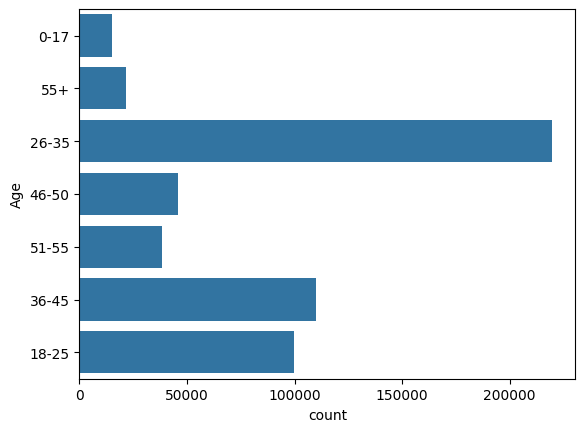

In [9]:
import seaborn as sns

sns.countplot(df['Age'])
# df['Age'].value_counts() # 표 형태로 보고 싶을 경우

26~35세의 연령대가 가장 많은 방문을 한 것을 알 수 있습니다.

<Axes: xlabel='Purchase', ylabel='Count'>

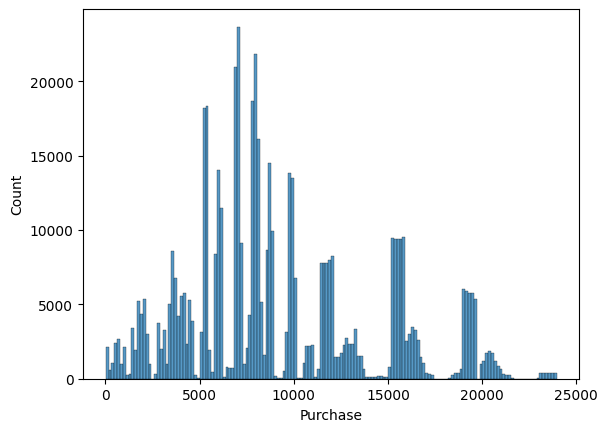

In [10]:
sns.histplot(df['Purchase'])

구입한 제품의 가격의 분포는 0 ~ 25000사이로, 5000 ~ 10000사이의 구매 가격이 가장 많은 것으로 알 수 있습니다.

In [11]:
# - `Product_ID`의 수, `Gender`, `Age` , `Occupation` `City_Category`,... 각 컬럼의 값의 유일값, 분포
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [12]:
# 어떤 제품(`Product_ID`)가 제일 비쌀까? 그 제품은 어떤 카테고리인가?
df.sort_values(by='Purchase', ascending=False).head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960
349658,1005848,P00119342,M,51-55,20,A,0,1,10,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,23960
298378,1003947,P00116142,M,26-35,0,C,3,0,10,23959
437804,1001387,P00086242,F,51-55,13,B,1,1,10,23959
229329,1005367,P00085342,M,18-25,4,A,1,0,10,23958


<Axes: xlabel='Purchase', ylabel='Count'>

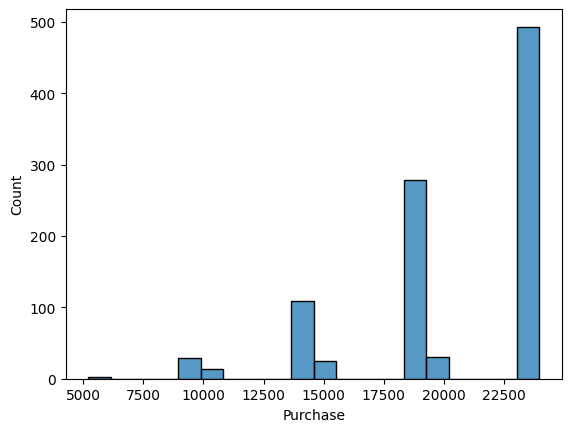

In [13]:
sns.histplot(df[df['Product_ID']=='P00052842']['Purchase'])

In [14]:
# - 가장 많이 팔린 제품은?
df['Product_ID'].value_counts()[:10]

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00059442,1406


In [15]:
df.groupby('Product_ID').size().sort_values(ascending=False)[:10]#.head(10)

,0
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00145042,1406


In [16]:
# Wallmart를 자주 찾는 사용자의 직업군은?
df['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


- `구매금액`과 `사용자 성별`간의 관계
- `구매금액`과 `결혼 상태`간의 관계

In [17]:
df['User_ID'].nunique()

5891

In [18]:
total = df['User_ID'].value_counts().sum() # 550068

In [19]:
top10 = df['User_ID'].value_counts()[:500].sum() # 8303

In [20]:
round((top10 / total) * 100, 2)

34.03

# Plotly
- scatter(산점도): 데이터의 **"분포"**를 '점'으로 표시
  - `x`축: 실수형, `y`축: 실수형
- bar(막대): 데이터의 크기를 막대의 길이로 표시
  - `x`축: 범주형, `y`축: 실수형
  - 범주형 데이터에 대해서 **집계 연산(aggregation)**을 수행한 뒤 그래프를 그리도록 해야함
    - 예: sum(), size(), mean()
- pie

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [22]:
import plotly.express as px
# 잘못된 방법
# fig = px.bar(data_frame=df, x='Age', y='Purchase')
# fig.show()

In [23]:
# 'Age'별 평균 구매금액('Purchase')
age_grouped_df = df.groupby('Age')['Purchase'].mean().reset_index()
age_grouped_df

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


In [24]:
# 집계(mean()) 연산 진행한 데이터 프레임으로 bar 차트 생성
fig = px.bar(data_frame=age_grouped_df, x='Age', y='Purchase')
fig.show()

In [25]:
# 그룹 연산을 두 개 이상의 컬럼에 대해 수행
grouped_df = df.groupby([ 'Gender', 'Age',])['Purchase'].mean().reset_index()
grouped_df

,Gender,Age,Purchase
0,F,0-17,8338.771985
1,F,18-25,8343.180201
2,F,26-35,8728.251754
3,F,36-45,8959.844056
4,F,46-50,8842.098947
5,F,51-55,9042.449666
6,F,55+,9007.036199
7,M,0-17,9235.173670
8,M,18-25,9440.942971
9,M,26-35,9410.337578


In [26]:
# 누적 막대그래프
# fig = px.bar(data_frame=grouped_df, x='Age', y='Purchase', color = 'Gender')

# Gender 범주에 따라 막대를 별도로 표시
fig = px.bar(data_frame=grouped_df, x='Age', y='Purchase', color = 'Gender', barmode = 'group')
fig.show()

In [27]:
# 파이차트 : names(범주), values(실수)
fig = px.pie(data_frame=grouped_df, names='Gender', values='Purchase')
fig.show()

In [28]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(values=grouped_df['Purchase'], labels=grouped_df['Gender'])])
fig.show()

# 분석1: 데이터 분석을 통한 마케팅 전략 제안
  - (목표) VIP 고객을 찾아서 **고객 맞춤 프로모션 제안**
  - **[VIP 고객 선정 기준]**
    - 고객의 구매금액 기준, 구매금액 합계가 가장 높은 Top10
    - 고객의 구매금액 기준, 구매금액 평균이 가장 높은 Top10
    - 고객의 구매 항목 개수 기준, 가장 많은 항목을 구매한 고객 Top10
  - **[VIP 고객 특징 분석]**
    - VIP 고객들의 성별, 연령, 직업, 지역, 결혼 여부, 제품 품목에 대한 분석
    - 분석 결과를 바탕으로 고객 맞춤 프로모션 관련 제언

## VIP 고객 리스트 선정

In [29]:
# VIP 고객 선정1 - 고객의 구매금액 기준, 구매금액 합계가 가장 높은 Top10
vip1 = df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)[:10].index.to_list()

고객의 구매금액 기준, 구매금액 합계가 가장 높은 사용자를 구하기 위해, `User_ID` 기준으로 그룹 연산(groupby)을 수행하여, `Purchase` 컬럼의 합계(sum) 기준 내림차순하여 10명의 사용자를 추출하였습니다. 그 결과 선정된 VIP의 리스트는 다음과 같습니다.<br>
▶ [1004277, 1001680, 1002909, 1001941, 1000424, 1004448, 1005831, 1001015,
       1003391, 1001181]

In [30]:
# VIP 고객 선정2 - 고객의 구매금액 기준, 구매금액 평균이 가장 높은 Top10
vip2 = df.groupby('User_ID')['Purchase'].mean().sort_values(ascending=False)[:10].index.to_list()

고객의 구매금액 기준, 구매금액 평균이 가장 높은 사용자를 구하기 위해, `User_ID` 기준으로 그룹 연산(groupby)을 수행하여, `Purchase` 컬럼의 평균(mean) 기준 내림차순하여 10명의 사용자를 추출하였습니다. 그 결과 선정된 VIP의 리스트는 다음과 같습니다.<br>
▶ [1003902, 1005069, 1005999, 1001349, 1003461, 1000101, 1002983, 1005994,
       1000592, 1004474]

In [31]:
# VIP 고객 선정3 - 고객의 구매 항목 개수 기준, 가장 많은 항목을 구매한 고객 Top10
vip3 = df.groupby('User_ID')['Purchase'].size().sort_values(ascending=False)[:10].index.to_list()

고객의 구매금액 기준, 구매항목 개수 기준, 가장 많은 항목을 구매한 사용자를 구하기 위해, `User_ID` 기준으로 그룹 연산(groupby)을 수행하여, `Purchase` 컬럼의 개수(size) 기준 내림차순하여 10명의 사용자를 추출하였습니다. 그 결과 선정된 VIP의 리스트는 다음과 같습니다. <br>
▶ [1001680, 1004277, 1001941, 1001181, 1000889, 1003618, 1001150, 1001015,
       1005795, 1005831]

In [32]:
# vip 전체 리스트(중복 있을 수도 있음)
vip1 + vip2 + vip3

[1004277,
 1001680,
 1002909,
 1001941,
 1000424,
 1004448,
 1005831,
 1001015,
 1003391,
 1001181,
 1003902,
 1005069,
 1005999,
 1001349,
 1003461,
 1000101,
 1002983,
 1005994,
 1000592,
 1004474,
 1001680,
 1004277,
 1001941,
 1001181,
 1000889,
 1003618,
 1001150,
 1001015,
 1005795,
 1005831]

In [33]:
# vip  데이터 프레임 생성
vip_df = df[df['User_ID'].isin(vip1 + vip2 + vip3)].copy()
vip_df.shape

(11331, 10)

`User_ID`기준으로 VIP 조건을 만족하는 데이터만 추출하여 `vip_df`에 할당하였습니다.

## VIP 고객 특성 분석

In [38]:
# vip 남성 고객 중, 구매 금액이 큰 순서대로 정렬하여 10명 선정
vip_df[vip_df['Gender'] == 'M'].sort_values(by='Purchase', ascending=False).head(10)[['Age', 'Occupation', 'City_Category',
                                                                                     'Product_Category']]

,Age,Occupation,City_Category,Product_Category
21457,18-25,4,A,10
356100,46-50,20,A,10
83368,46-50,20,A,10
271275,26-35,1,A,10
236111,26-35,17,A,10
470099,26-35,17,A,10
192977,26-35,1,A,10
166366,26-35,20,A,10
534362,36-45,16,A,10
392632,26-35,17,A,10


20대 후반~ 30대 초반의 사용자가 고액의 제품을 구매하였고, 이들은 모두 'A' 지역 출신임을 확인할 수 있었습니다. 또한 직업은 20, 17번 카테고리를 갖는 경향이 있었으며, 해당 제품은 10번 카테고리였습니다.
추후 구매 가능성이 높은 **20대~ 30대 초반**, **A지역**, **20, 17번 카테고리의 직업군**을 대상으로 프로모션을 진행하는 것을 제안합니다.

  # 분석 2: 지역별 소비 패턴 분석을 통한 제품 카테고리 제안
  매장 담당자에게 각 지역별 매장 운영을 어떻게 하는 것이 효율적일지 제안을 하고자 합니다.
  
    - 각 지역별 판매 금액 합계, 사용자 수, 사용자의 연령, 직업, 결혼 여부 분석
    - 각 지역별 특징 도출
    - 각 지역별 소비 패턴 기반 매장 운영 방법 제언

In [40]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


데이터에 포함된 지역은 A, B, C의 세 개의 지역이 존재합니다. 각 지역에 구매 이력 데이터는 각각 약 15만건, 23만건, 17만건이 존재합니다. 각 지역별 사용자, 구매금액 합계를 살펴보겠습니다.

In [41]:
# 각 지역별 구매금액 합계
df.groupby('City_Category')['Purchase'].sum()

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


각 지역별 구매금액의 합계는 각 지역별 구매내역의 개수와 비례하여 발생한 것을 확인할 수 있습니다. 즉 B지역의 구매금액 합계가 가장 크고, A지역의 구매금액 합계가 가장 낮았습니다.

In [48]:
# 각 지역별 사용자의 수
df[['User_ID', 'City_Category']].drop_duplicates()['City_Category'].value_counts()

,count
City_Category,
C,3139
B,1707
A,1045


각 지역별 사용자 수는 C, B, A 순으로 지역별 구매금액 합계나 구매 건수와는 무관한 것으로 확인되었습니다.

<Axes: xlabel='count', ylabel='City_Category'>

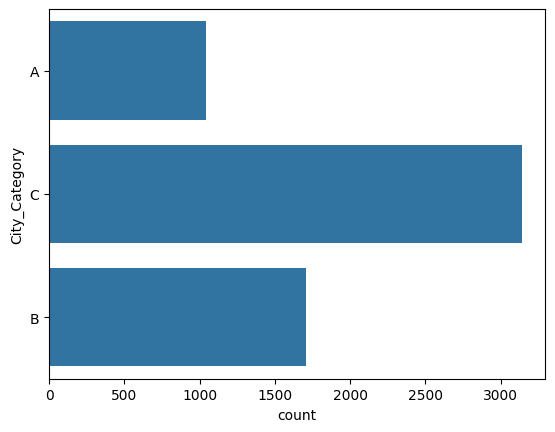

In [50]:
import seaborn as sns

sns.countplot(df[['User_ID', 'City_Category']].drop_duplicates()['City_Category'])

In [52]:
# 사용자 정보와 무관한 제품정보('Product_ID', 'Product_Category', 'Purchase')를 제거
user_df = df.drop(columns=['Product_ID', 'Product_Category', 'Purchase']).drop_duplicates().copy()
# 사용자 정보와 관련 있는 데이터만 생성
user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


In [58]:
# A, B, C 지역의 데이터 프레임을 별도로 생성
a_df = user_df[user_df['City_Category'] == 'A']
b_df = user_df[user_df['City_Category'] == 'B']
c_df = user_df[user_df['City_Category'] == 'C']

<Axes: xlabel='count', ylabel='Occupation'>

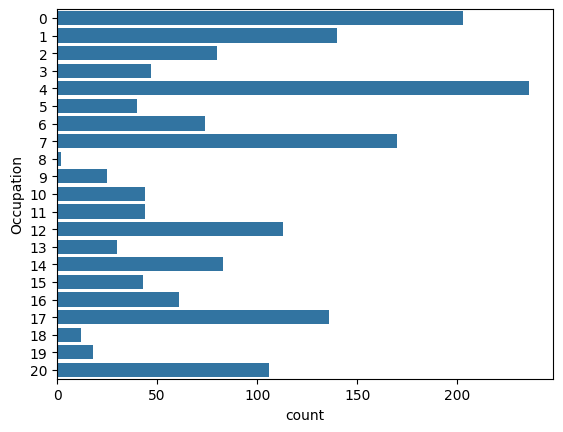

In [60]:
# B 지역의 직업별 분포
sns.countplot(b_df['Occupation'].astype('category'))

<Axes: xlabel='count', ylabel='Occupation'>

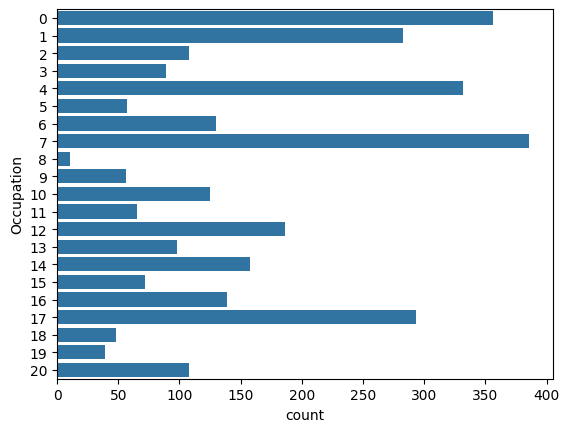

In [62]:
# C 지역의 직업별 분포
sns.countplot(c_df['Occupation'].astype('category'))

In [66]:
b_df['Occupation'].value_counts()[5:10]

,count
Occupation,
12,113
20,106
14,83
2,80
6,74


In [67]:
c_df['Occupation'].value_counts()[5:10]

,count
Occupation,
12,186
14,158
16,139
6,130
10,125


In [68]:
vip_df['Occupation'].value_counts()

,count
Occupation,
20,2601
17,2359
7,1620
1,1516
16,979
3,806
4,729
14,575
5,94


B지역과 C지역의 사용자의 차이가 나는 부분을 분석한 결과, 성별, 연령 등 다른 특징에서는 크게 차이가 나는 것을 발견할 수 없었습니다. 하지만 직업군에서는 조금의 차이가 나타났는데, 20 직업군에 해당하는 사용자가 B지역에 많은 부분을 차지하고 있음을 확인할 수 있었습니다. 특정 직업군이 마트 매출에 영향을 주는 것으로 유추할 수 있습니다.